In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, classification_report

In [ ]:
train_data = pd.read_csv("/content/processed_train.csv", delimiter = ',')
test_data = pd.read_csv("/content/processed_test.csv", delimiter = ',')

In [ ]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,hours-per-week_cat,workclass_cat,education_cat,marital-status_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native-country_cat,salary_label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,2,5,9,4,0,1,4,1,38,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,1,4,9,2,3,0,4,1,38,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,2,2,11,0,5,1,4,1,38,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,2,2,1,2,5,0,2,1,38,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,2,2,9,2,9,5,2,0,4,0


In [ ]:
nr_rows = len(train_data)
nr_rows_with_bigger_incomes = len(train_data[train_data['salary']=='>50K'])
nr_rows_with_lower_incomes = len(train_data[train_data['salary']=='<=50K'])
bigger_incomes_percent = round(nr_rows_with_bigger_incomes / nr_rows * 100, 2)
lower_incomes_percent = round(nr_rows_with_lower_incomes / nr_rows * 100, 2)
print(f'{lower_incomes_percent}% people win less that 50K while {bigger_incomes_percent}% more.')
print(f'{nr_rows} training samples, {len(test_data)} test samples')

75.11% people win less that 50K while 24.89% more.
30162 training samples, 15060 test samples


In [ ]:
print(f'Our proccesed data have {len(train_data.columns)} columns.')
print(f'Columns: {train_data.columns}')

Our proccesed data have 28 columns.
Columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary', 'age_cat', 'capital-gain_cat', 'capital-loss_cat',
       'hours-per-week_cat', 'workclass_cat', 'education_cat',
       'marital-status_cat', 'occupation_cat', 'relationship_cat', 'race_cat',
       'sex_cat', 'native-country_cat', 'salary_label'],
      dtype='object')


In [ ]:
columns_for_training = [column for column in train_data.columns if column.endswith("_cat")]
columns_for_training.append("fnlwgt")
len(columns_for_training)

13

In [ ]:
X_train = train_data[columns_for_training]
y_train = train_data['salary_label']
X_test = test_data[columns_for_training]
y_test = test_data['salary_label']

In [ ]:
def train_random_forest(X_train, X_test, max_features):
  Bag = RandomForestClassifier(n_estimators = 1000, max_features = max_features)
  Bag = Bag.fit(X_train, y_train)

  importances = Bag.feature_importances_
  forest_importances = pd.Series(importances, index = columns_for_training).sort_values(ascending=False)

  std = np.std([tree.feature_importances_ for tree in Bag.estimators_], axis = 0)

  fig, ax = plt.subplots()
  forest_importances.plot.bar(yerr = std, ax = ax)
  ax.set_title("Feature importances using MDI")
  ax.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()

  print(forest_importances)

  rf_test_pred = Bag.predict(X_test)
  plot_confusion_matrix(Bag, X_test, y_test, cmap = plt.cm.PuBuGn)
  print(classification_report(y_test, rf_test_pred))

  return Bag, rf_test_pred

fnlwgt                0.299125
relationship_cat      0.209700
education_cat         0.117920
occupation_cat        0.087136
age_cat               0.079985
workclass_cat         0.050032
capital-gain_cat      0.044847
hours-per-week_cat    0.044574
native-country_cat    0.018990
race_cat              0.016748
capital-loss_cat      0.015268
marital-status_cat    0.010573
sex_cat               0.005102
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11360
           1       0.66      0.59      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.74      0.75     15060
weighted avg       0.82      0.82      0.82     15060

fnlwgt                0.293796
relationship_cat      0.165968
education_cat         0.116339
occupation_cat        0.088301
age_cat               0.084819
workclass_cat         0.051004
marital-status_cat    0.050857
hours-per-week_cat    0.045213
capital-gain_cat      0.045100
native-country_cat    0.019268
race_cat              0.017237
capital-loss_cat      0.015710
sex_cat               0.006388
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11360
           1       0.66      0.59      0.63      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.75      0.76     15060
weighted avg       0.82      0.83      0.82     15060

fnlwgt                0.288357
relationship_cat      0.133686
education_cat         0.111817
age_cat               0.092537
occupation_cat        0.091802
marital-status_cat    0.074053
workclass_cat         0.052577
capital-gain_cat      0.047144
hours-per-week_cat    0.046442
native-country_cat    0.019655
race_cat              0.017979
capital-loss_cat      0.016274
sex_cat               0.007676
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11360
           1       0.66      0.60      0.63      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.75      0.76     15060
weighted avg       0.82      0.83      0.82     15060

fnlwgt                0.283026
relationship_cat      0.109641
education_cat         0.107764
age_cat               0.102151
occupation_cat        0.100110
marital-status_cat    0.074857
workclass_cat         0.051823
hours-per-week_cat    0.051570
capital-gain_cat      0.050033
native-country_cat    0.019833
race_cat              0.017599
capital-loss_cat      0.017046
sex_cat               0.014548
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11360
           1       0.67      0.60      0.63      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.75      0.76     15060
weighted avg       0.82      0.83      0.82     15060



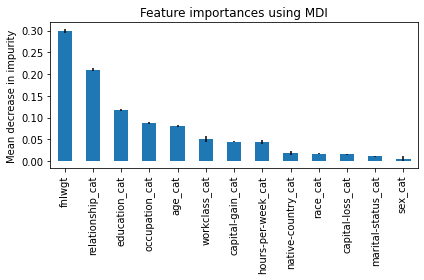

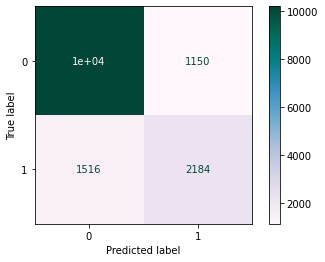

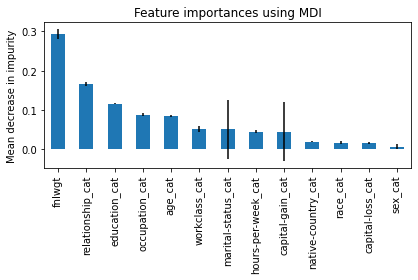

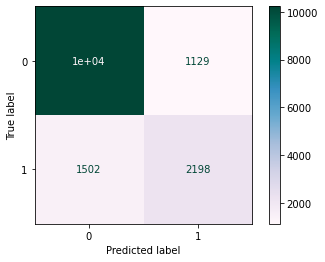

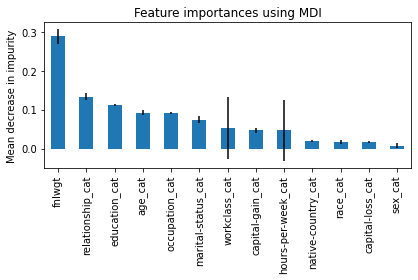

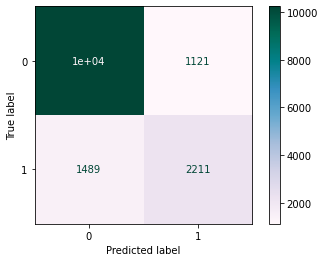

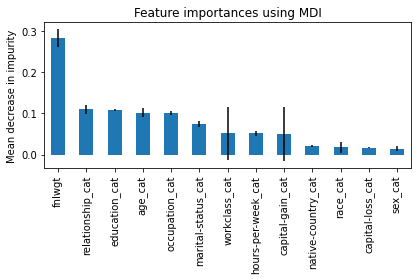

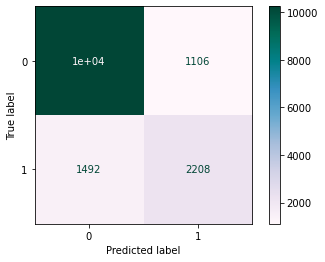

In [ ]:
feature_numbers = [13, 10, 7, 3]
models = []
predictions = []
for feature_number in feature_numbers:
  model, prediction = train_random_forest(X_train, X_test, feature_number)
  models.append(model)
  predictions.append(prediction)

In [ ]:
len(test_data[test_data['salary_label']==0])

11360

In [ ]:
def compute_scores(models_names, predictions):
  conclusion = pd.DataFrame({'Model': models_names})
  accuracies, precisions, recalls, f1_scores  = [], [], [], []

  for predicition in predictions:
    accuracies.append(accuracy_score(y_test, predicition))
    precisions.append(precision_score(y_test, predicition))
    recalls.append(recall_score(y_test, predicition))
    f1_scores.append(f1_score(y_test, predicition))

  conclusion['accuracy'] = accuracies
  conclusion['precision'] = precisions
  conclusion['recall'] = recalls
  conclusion['f1'] = f1_scores

  return conclusion

In [ ]:
compute_scores(['Random Forest - Bagged','Random Forest - 10', 'Random Forest - 7', 'Random Forest - 3'], predictions)

,Model,accuracy,precision,recall,f1
0,Random Forest - Bagged,0.822975,0.655069,0.590270,0.620984
1,Random Forest - 10,0.825299,0.660655,0.594054,0.625587
2,Random Forest - 7,0.826693,0.663565,0.597568,0.628840
3,Random Forest - 3,0.827490,0.666264,0.596757,0.629598


fnlwgt                0.294019
relationship_cat      0.169825
education_cat         0.116469
occupation_cat        0.088392
age_cat               0.084150
workclass_cat         0.051048
marital-status_cat    0.047672
hours-per-week_cat    0.045149
capital-gain_cat      0.045013
native-country_cat    0.019290
race_cat              0.017219
capital-loss_cat      0.015602
sex_cat               0.006153
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11360
           1       0.66      0.59      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.77      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



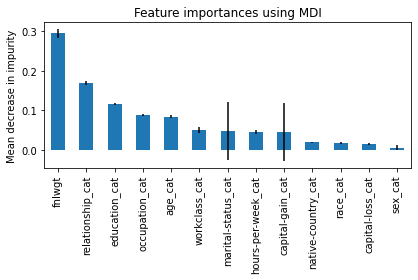

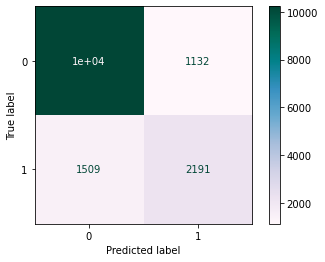

In [ ]:
least_important_columns = ['sex_cat', 'marital-status_cat', 'capital-loss_cat']
X_train.drop(columns=least_important_columns)
X_test.drop(columns=least_important_columns)
model, prediction = train_random_forest(X_train, X_test, 10)

In [ ]:
compute_scores(['Random Forest - Bagged - top 10 features'], [prediction])

,Model,accuracy,precision,recall,f1
0,Random Forest - Bagged - top 10 features,0.824635,0.659344,0.592162,0.62395


fnlwgt                0.286594
relationship_cat      0.127280
education_cat         0.109925
age_cat               0.097025
occupation_cat        0.093411
marital-status_cat    0.074652
workclass_cat         0.053196
hours-per-week_cat    0.047561
capital-gain_cat      0.046859
native-country_cat    0.019807
race_cat              0.018281
capital-loss_cat      0.016390
sex_cat               0.009019
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11360
           1       0.66      0.60      0.63      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.75      0.76     15060
weighted avg       0.82      0.83      0.82     15060



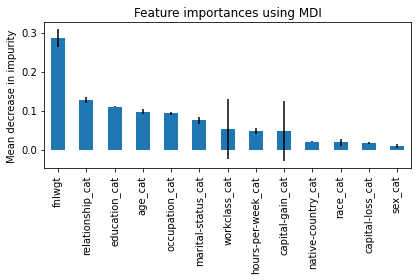

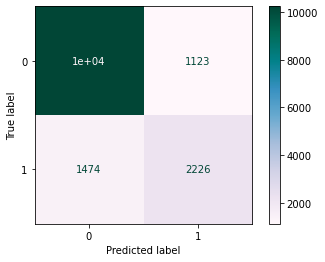

In [ ]:
next_least_important_columns = ['race_cat', 'native-country_cat', 'hours-per-week_cat', 'capital-gain_cat']
X_train.drop(columns=next_least_important_columns)
X_test.drop(columns=next_least_important_columns)
model, prediction = train_random_forest(X_train, X_test, 6)

In [ ]:
compute_scores(['Random Forest - Bagged - top 6 features'], [prediction])

,Model,accuracy,precision,recall,f1
0,Random Forest - Bagged - top 6 features,0.827556,0.664676,0.601622,0.631579


In [ ]:
continuous_columns_for_training = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
category_columns_for_training = ['workclass_cat', 'marital-status_cat', 'occupation_cat', 'relationship_cat', 'race_cat', 'sex_cat', 'native-country_cat']
columns_for_training = continuous_columns_for_training + category_columns_for_training
len(columns_for_training)

13

In [ ]:
X_train = train_data[columns_for_training]
X_test = test_data[columns_for_training]

relationship_cat      0.199169
fnlwgt                0.197120
education-num         0.128205
age                   0.122532
capital-gain          0.112777
hours-per-week        0.070303
occupation_cat        0.061208
capital-loss          0.036102
workclass_cat         0.035616
native-country_cat    0.013465
race_cat              0.012436
marital-status_cat    0.007135
sex_cat               0.003934
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.61      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

fnlwgt                0.190923
relationship_cat      0.166262
education-num         0.125290
age                   0.125253
capital-gain          0.120613
hours-per-week        0.071287
occupation_cat        0.062089
capital-loss          0.036485
workclass_cat         0.036452
marital-status_cat    0.034232
native-country_cat    0.013856
race_cat              0.012700
sex_cat               0.004557
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.61      0.67      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

fnlwgt                0.180726
age                   0.136702
education-num         0.124645
relationship_cat      0.123534
capital-gain          0.120399
hours-per-week        0.075561
marital-status_cat    0.064340
occupation_cat        0.064056
workclass_cat         0.038192
capital-loss          0.036264
native-country_cat    0.014639
race_cat              0.013425
sex_cat               0.007516
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.74      0.61      0.67      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.77      0.79     15060
weighted avg       0.85      0.85      0.85     15060



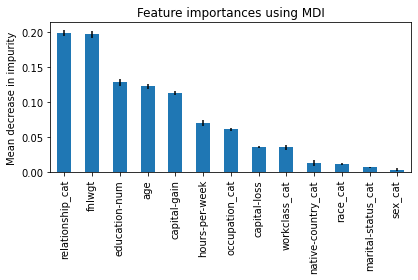

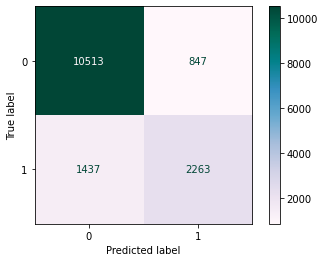

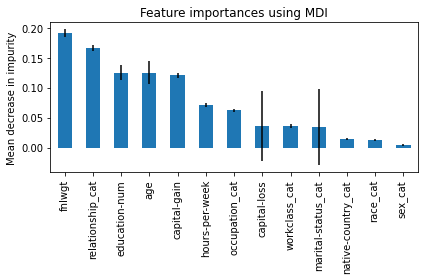

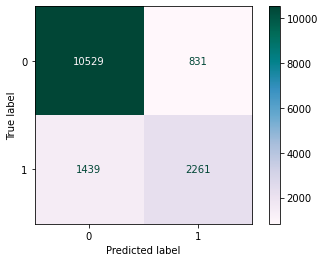

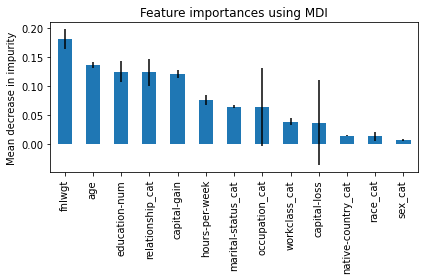

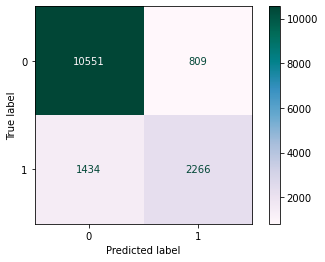

In [ ]:
feature_numbers = [13, 9, 5]
models = []
predictions = []
for feature_number in feature_numbers:
  model, prediction = train_random_forest(X_train, X_test, feature_number)
  models.append(model)
  predictions.append(prediction)

In [ ]:
compute_scores(['Random Forest - Bagged','Random Forest - 9', 'Random Forest - 5'], predictions)

,Model,accuracy,precision,recall,f1
0,Random Forest - Bagged,0.848340,0.727653,0.611622,0.664611
1,Random Forest - 9,0.849270,0.731242,0.611081,0.665783
2,Random Forest - 5,0.851062,0.736911,0.612432,0.668930


fnlwgt                0.188442
relationship_cat      0.157832
age                   0.126246
education-num         0.124861
capital-gain          0.122082
hours-per-week        0.071912
occupation_cat        0.062427
marital-status_cat    0.041335
workclass_cat         0.036699
capital-loss          0.036416
native-country_cat    0.013998
race_cat              0.012917
sex_cat               0.004832
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.61      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



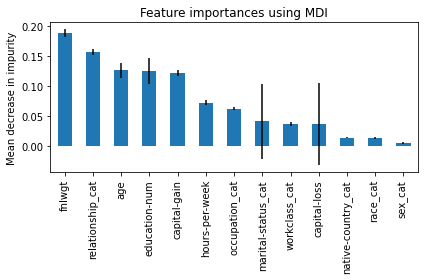

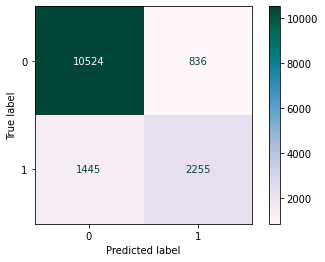

In [ ]:
least_important_columns = ['sex_cat', 'race_cat', 'native-country_cat', 'capital-loss', 'workclass_cat']
X_train.drop(columns=least_important_columns)
X_test.drop(columns=least_important_columns)
model, prediction = train_random_forest(X_train, X_test, 8)

In [ ]:
compute_scores(['Random Forest - Bagged - 5 columns removed'], [prediction])

,Model,accuracy,precision,recall,f1
0,Random Forest - Bagged - 5 columns removed,0.848539,0.729537,0.609459,0.664114


fnlwgt                0.180479
age                   0.136579
relationship_cat      0.125729
education-num         0.123754
capital-gain          0.122174
hours-per-week        0.075199
occupation_cat        0.063845
marital-status_cat    0.062250
workclass_cat         0.037956
capital-loss          0.036579
native-country_cat    0.014624
race_cat              0.013491
sex_cat               0.007342
dtype: float64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.74      0.61      0.67      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.77      0.79     15060
weighted avg       0.85      0.85      0.85     15060



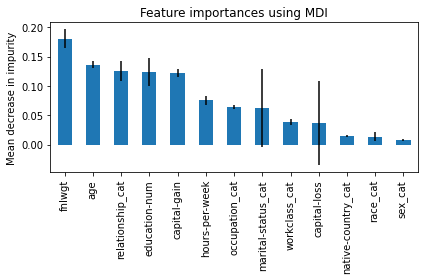

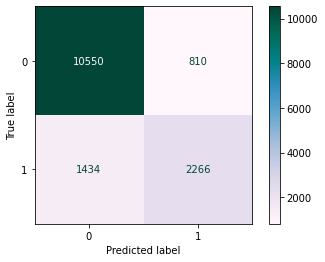

In [ ]:
model, prediction = train_random_forest(X_train, X_test, 5)

In [ ]:
compute_scores(['Random Forest - Bagged - 5 columns removed - 5 max_features'], [prediction])

,Model,accuracy,precision,recall,f1
0,Random Forest - Bagged - 5 columns removed - 5...,0.850996,0.736671,0.612432,0.668831
